# Import Required Libraries
Import the necessary libraries, including os, glob, pandas, and matplotlib.

In [1]:
# Import Required Libraries
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Define Helper Functions
Define helper functions to read and parse .stats files.

In [2]:
# Define Helper Functions

def read_stats_file(file_path):
    """
    Reads a .stats file and returns a dictionary with the parsed data.
    """
    data = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, value = line.split(':')
            key = key.strip()
            value = value.strip()
            if key == "Complete Lines per Device":
                data[key] = list(map(int, value.split()))
            elif key in ["Run Number", "First Timestamp", "Last Timestamp", "Number of KCUs", "Number of Samples", "Number of Packets", "Complete Lines", "Incomplete Lines", "Aligned Events"]:
                data[key] = int(value)
            else:
                data[key] = list(map(int, value.split()))
    return data

def parse_stats_files(directory):
    """
    Parses all .stats files in the given directory and returns a DataFrame with the combined data.
    """
    stats_files = glob.glob(os.path.join(directory, '*.stats'))
    all_data = []
    for file_path in stats_files:
        data = read_stats_file(file_path)
        all_data.append(data)
    return pd.DataFrame(all_data)

# Read .stats Files
Use glob to find all .stats files in the specified directory.

In [3]:
# Read .stats Files
# Use glob to find all .stats files in the specified directory.

# Define the directory containing the .stats files
stats_directory = "/Volumes/tlprotzman-data/data/output/"

# Parse all .stats files in the directory
stats_df = parse_stats_files(stats_directory)

# Display the first few rows of the DataFrame to verify the data
stats_df.head()

,Run Number,First Timestamp,Last Timestamp,Number of KCUs,Number of Samples,Number of Packets,Complete Lines,Incomplete Lines,Complete Lines per Device,Aborted Waveforms,Completed Waveforms,In Order Waveforms,Aligned Events
0,81,0,0,4,10,22510,161994,0,"[51085, 51085, 51100, 51100, 51095, 51095, 510...","[3, 3, 533, 6]","[1019, 1019, 489, 1016]","[1019, 1019, 489, 1016]",69
1,302,0,0,4,10,46169,319284,0,"[99775, 99775, 99770, 99770, 99770, 99770, 997...","[11, 8, 22, 9]","[1985, 1988, 1974, 1987]","[1985, 1988, 1974, 1987]",1951
2,222,0,0,4,10,44991,321530,3963,"[101709, 101700, 101718, 101761, 100685, 10055...","[1027, 1042, 1056, 1050]","[1603, 1564, 1583, 1569]","[1603, 1564, 1583, 1569]",64
3,267,0,0,4,10,45681,327598,0,"[102390, 102390, 102375, 102375, 102385, 10238...","[7, 9, 15, 12]","[2041, 2039, 2033, 2036]","[2041, 2039, 2033, 2036]",2005
4,123,0,0,4,10,2688,19194,0,"[6000, 6000, 5995, 5995, 5995, 5995, 6000, 600...","[1, 1, 1, 2]","[119, 119, 119, 118]","[119, 119, 119, 118]",116


# Extract Data from .stats Files
Extract relevant data such as run number, complete lines, incomplete lines, and aligned events from each .stats file.

In [4]:
# Extract Data from .stats Files

# Extract relevant data such as run number, complete lines, incomplete lines, and aligned events from each .stats file
# The data is already parsed and stored in the DataFrame `stats_df`

# Display the first few rows of the DataFrame to verify the data
stats_df.head()

,Run Number,First Timestamp,Last Timestamp,Number of KCUs,Number of Samples,Number of Packets,Complete Lines,Incomplete Lines,Complete Lines per Device,Aborted Waveforms,Completed Waveforms,In Order Waveforms,Aligned Events
0,81,0,0,4,10,22510,161994,0,"[51085, 51085, 51100, 51100, 51095, 51095, 510...","[3, 3, 533, 6]","[1019, 1019, 489, 1016]","[1019, 1019, 489, 1016]",69
1,302,0,0,4,10,46169,319284,0,"[99775, 99775, 99770, 99770, 99770, 99770, 997...","[11, 8, 22, 9]","[1985, 1988, 1974, 1987]","[1985, 1988, 1974, 1987]",1951
2,222,0,0,4,10,44991,321530,3963,"[101709, 101700, 101718, 101761, 100685, 10055...","[1027, 1042, 1056, 1050]","[1603, 1564, 1583, 1569]","[1603, 1564, 1583, 1569]",64
3,267,0,0,4,10,45681,327598,0,"[102390, 102390, 102375, 102375, 102385, 10238...","[7, 9, 15, 12]","[2041, 2039, 2033, 2036]","[2041, 2039, 2033, 2036]",2005
4,123,0,0,4,10,2688,19194,0,"[6000, 6000, 5995, 5995, 5995, 5995, 6000, 600...","[1, 1, 1, 2]","[119, 119, 119, 118]","[119, 119, 119, 118]",116


In [5]:
# Split the lists in 'Complete Lines per Device', 'Aborted Waveforms', 'Completed Waveforms', and 'In Order Waveforms' into their own columns
for i in range(16):    
    stats_df[f'Complete Lines Device {i+1}'] = stats_df['Complete Lines per Device'].apply(lambda x: x[i])
for i in range(4):
    stats_df[f'Aborted Waveforms Device {i+1}'] = stats_df['Aborted Waveforms'].apply(lambda x: x[i])
    stats_df[f'Completed Waveforms Device {i+1}'] = stats_df['Completed Waveforms'].apply(lambda x: x[i])
    stats_df[f'In Order Waveforms Device {i+1}'] = stats_df['In Order Waveforms'].apply(lambda x: x[i])

# Drop the original columns with lists
stats_df.drop(columns=['Complete Lines per Device', 'Aborted Waveforms', 'Completed Waveforms', 'In Order Waveforms'], inplace=True)

# Display the first few rows of the updated DataFrame to verify the changes
stats_df.head()

,Run Number,First Timestamp,Last Timestamp,Number of KCUs,Number of Samples,Number of Packets,Complete Lines,Incomplete Lines,Aligned Events,Complete Lines Device 1,...,In Order Waveforms Device 1,Aborted Waveforms Device 2,Completed Waveforms Device 2,In Order Waveforms Device 2,Aborted Waveforms Device 3,Completed Waveforms Device 3,In Order Waveforms Device 3,Aborted Waveforms Device 4,Completed Waveforms Device 4,In Order Waveforms Device 4
0,81,0,0,4,10,22510,161994,0,69,51085,...,1019,3,1019,1019,533,489,489,6,1016,1016
1,302,0,0,4,10,46169,319284,0,1951,99775,...,1985,8,1988,1988,22,1974,1974,9,1987,1987
2,222,0,0,4,10,44991,321530,3963,64,101709,...,1603,1042,1564,1564,1056,1583,1583,1050,1569,1569
3,267,0,0,4,10,45681,327598,0,2005,102390,...,2041,9,2039,2039,15,2033,2033,12,2036,2036
4,123,0,0,4,10,2688,19194,0,116,6000,...,119,1,119,119,1,119,119,2,118,118


Now let's merge this with the logbook from google sheets

In [6]:
# Read the CSV file into a DataFrame
google_sheets_df = pd.read_csv('logbook.csv')

# Convert '# trigger per spill' to a numeric type, coercing errors to NaN
# Remove any commas from the '# trigger per spill' column before converting
google_sheets_df['# trigger per spill'] = google_sheets_df['# trigger per spill'].str.replace(',', '')

# Convert '# trigger per spill' to a numeric type, coercing errors to NaN
google_sheets_df['# trigger per spill'] = pd.to_numeric(google_sheets_df['# trigger per spill'], errors='coerce')

# Assuming you already have a DataFrame named `stats_df`
# Merge the Google Sheets DataFrame with your existing DataFrame on 'Run Number'
stats_df = pd.merge(stats_df, google_sheets_df, on='Run Number', how='inner')

# Display the combined DataFrame
stats_df.head()

,Run Number,First Timestamp,Last Timestamp,Number of KCUs,Number of Samples,Number of Packets,Complete Lines,Incomplete Lines,Aligned Events,Complete Lines Device 1,...,end time (s),length (min),events/min,dead time,trig delay,calibration ADC,calibration TOA,Calibration TOT,machine gun number,comments
0,81,0,0,4,10,22510,161994,0,69,51085,...,8/31/2024 19:29:00,2.00,"1,374.00",20000.0,17.0,NaN,NaN,config_tot_a0_211_0830_1749.json\nconfig_tot_a...,9.0,Trig Delay 17
1,302,0,0,4,10,46169,319284,0,1951,99775,...,9/3/2024 12:55:00,28.00,71.36,1000.0,19.0,NaN,NaN,NaN,9.0,NaN
2,222,0,0,4,10,44991,321530,3963,64,101709,...,9/2/2024 2:37:00,1.00,"13,125.00",20000.0,19.0,NaN,NaN,NaN,9.0,NaN
3,267,0,0,4,10,45681,327598,0,2005,102390,...,9/2/2024 5:43:00,3.00,899.67,20000.0,19.0,NaN,NaN,NaN,9.0,NaN
4,123,0,0,4,10,2688,19194,0,116,6000,...,9/1/2024 15:56:00,6.00,34.83,20000.0,19.0,NaN,NaN,NaN,9.0,sign dac from 1 to 0


Clean up any runs without a species or energy

In [7]:
# List all unique beam species
unique_beam_species = stats_df['beam species'].unique()
print(unique_beam_species)
# Filter out runs with a missing beam species
stats_df = stats_df[stats_df['beam species'].notna()]
# Filter runs with a missing beam energy
stats_df = stats_df[stats_df['beam energy (GeV)'].notna()]

['Pion -' 'Muon +' 'Hadron +' 'Electron' nan]


In [8]:
# Sort the dataframe by 'Run Number'
stats_df = stats_df.sort_values(by='Run Number')

# Plot Performance as a Function of Run Number
Use matplotlib to plot the extracted data as a function of run number.

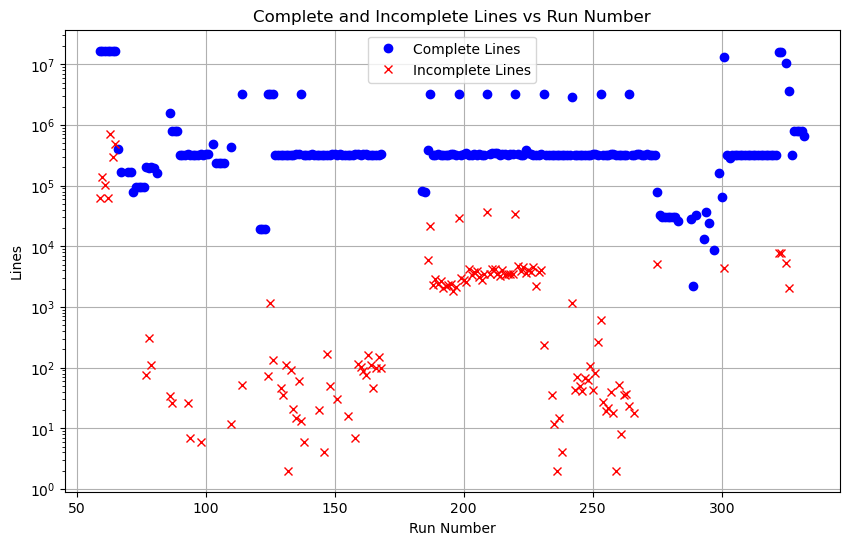

In [9]:
# Plot Complete and Incomplete Lines as a function of Run Number
plt.figure(figsize=(10, 6))
plt.plot(stats_df['Run Number'], stats_df['Complete Lines'], marker='o', linestyle='', color='b', label='Complete Lines')
plt.plot(stats_df['Run Number'], stats_df['Incomplete Lines'], marker='x', linestyle='', color='r', label='Incomplete Lines')
plt.xlabel('Run Number')
plt.ylabel('Lines')
plt.yscale('log')
plt.title('Complete and Incomplete Lines vs Run Number')
plt.legend()
plt.grid(True)
plt.show()


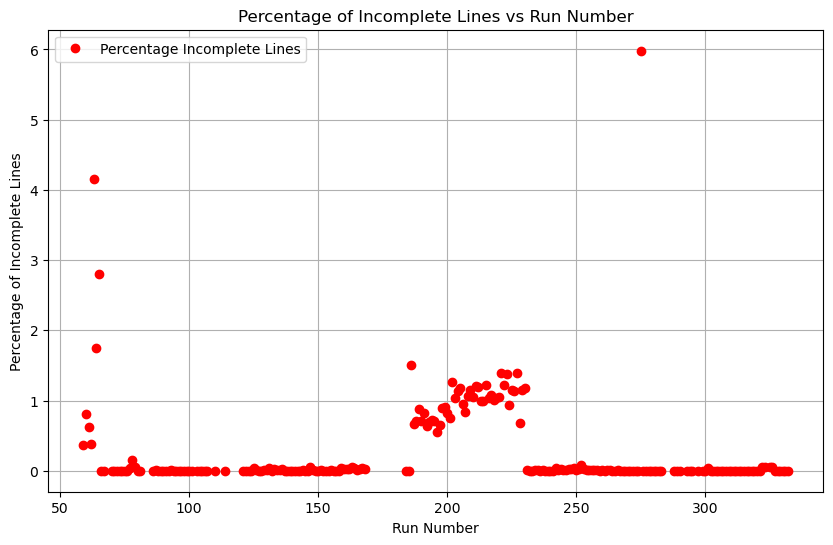

In [10]:
# Calculate the percentage of incomplete lines
stats_df['Percentage Incomplete Lines'] = (stats_df['Incomplete Lines'] / (stats_df['Complete Lines'] + stats_df['Incomplete Lines'])) * 100

# Plot the percentage of incomplete lines as a function of run number
plt.figure(figsize=(10, 6))
plt.plot(stats_df['Run Number'], stats_df['Percentage Incomplete Lines'], marker='o', linestyle='', color='r', label='Percentage Incomplete Lines')
plt.xlabel('Run Number')
plt.ylabel('Percentage of Incomplete Lines')
plt.title('Percentage of Incomplete Lines vs Run Number')
plt.legend()
plt.grid(True)
plt.show()

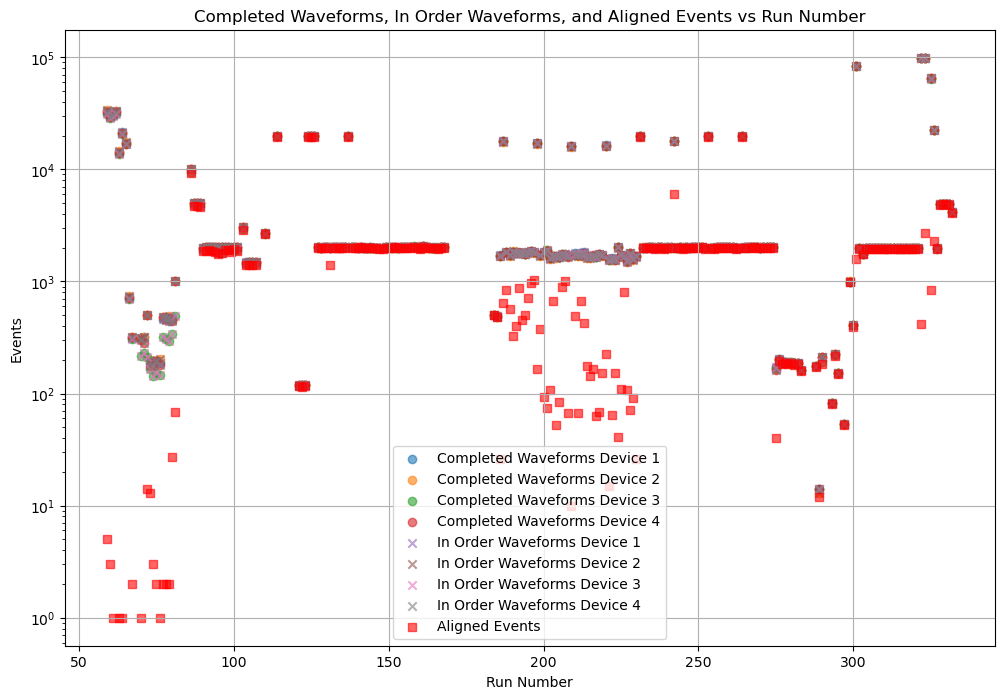

In [11]:
# Scatter plot for Completed Waveforms, In Order Waveforms, and Aligned Events

# Extract the relevant columns for plotting
completed_waveforms = stats_df[[f'Completed Waveforms Device {i+1}' for i in range(4)]]
in_order_waveforms = stats_df[[f'In Order Waveforms Device {i+1}' for i in range(4)]]
aligned_events = stats_df['Aligned Events']

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot for Completed Waveforms
for i in range(4):
    plt.scatter(stats_df['Run Number'], completed_waveforms.iloc[:, i], label=f'Completed Waveforms Device {i+1}', alpha=0.6, marker='o')

# Scatter plot for In Order Waveforms
for i in range(4):
    plt.scatter(stats_df['Run Number'], in_order_waveforms.iloc[:, i], label=f'In Order Waveforms Device {i+1}', alpha=0.6, marker='x')

# Scatter plot for Aligned Events
plt.scatter(stats_df['Run Number'], aligned_events, label='Aligned Events', color='r', alpha=0.6, marker='s')

# Labels and title
plt.xlabel('Run Number')
plt.ylabel('Events')
plt.yscale('log')
plt.title('Completed Waveforms, In Order Waveforms, and Aligned Events vs Run Number')
plt.legend()
plt.grid(True)
plt.show()

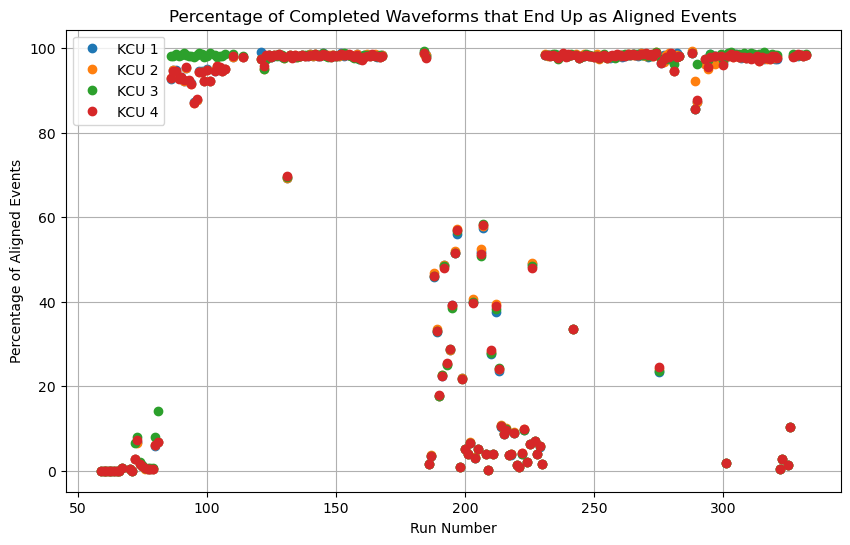

In [12]:
# Calculate the percentage of completed waveforms that end up as aligned events for each device separately
plt.figure(figsize=(10, 6))
for i in range(4):
    percentage_aligned_device = (aligned_events / completed_waveforms.iloc[:, i]) * 100
    
    # Plot the percentage as a function of run number for each device on the same plot
    plt.plot(stats_df['Run Number'], percentage_aligned_device, marker='o', linestyle='', label=f'KCU {i+1}')

plt.xlabel('Run Number')
plt.ylabel('Percentage of Aligned Events')
plt.title('Percentage of Completed Waveforms that End Up as Aligned Events')
plt.legend()
plt.grid(True)
plt.show()

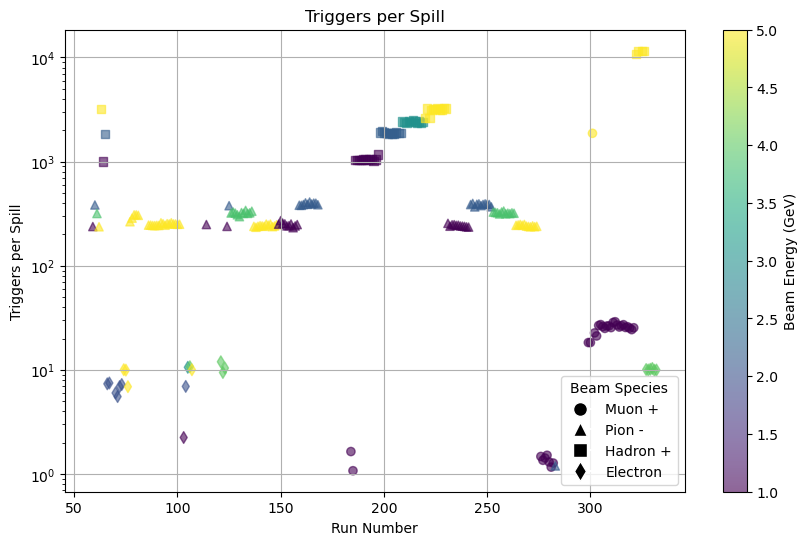

In [13]:
# Define colors for different beam energies
beam_energy_colors = stats_df['beam energy (GeV)'].astype(float)

# Define markers for different beam species
beam_species_markers = {'Muon +': 'o', 'Pion -': '^', 'Hadron +': 's', 'Electron': 'd'}
markers = stats_df['beam species'].map(beam_species_markers)

plt.figure(figsize=(10, 6))

# Plot each beam species with its corresponding marker
for species, marker in beam_species_markers.items():
    subset = stats_df[stats_df['beam species'] == species]
    plt.scatter(subset['Run Number'], subset['# trigger per spill'], c=subset['beam energy (GeV)'].astype(float), marker=marker, label=species, cmap='viridis', alpha=0.6)

plt.colorbar(label='Beam Energy (GeV)')
plt.xlabel('Run Number')
plt.ylabel('Triggers per Spill')
plt.title('Triggers per Spill')

# Create a custom legend for the beam species markers
handles = [plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='k', markersize=10, label=species) 
           for species, marker in beam_species_markers.items()]
plt.legend(handles=handles, title='Beam Species')
plt.yscale('log')
plt.grid(True)
plt.show()

Get rid of any runs below 100, when we were still testing things.

In [14]:
# Filter out runs below 100
stats_df = stats_df[stats_df['Run Number'] >= 80]

# Display the first few rows of the filtered DataFrame to verify the changes
stats_df.head()

,Run Number,First Timestamp,Last Timestamp,Number of KCUs,Number of Samples,Number of Packets,Complete Lines,Incomplete Lines,Aligned Events,Complete Lines Device 1,...,length (min),events/min,dead time,trig delay,calibration ADC,calibration TOA,Calibration TOT,machine gun number,comments,Percentage Incomplete Lines
84,80,0,0,4,10,27179,195602,0,27,61720,...,3.00,617.33,40000.0,17.0,NaN,NaN,config_tot_a0_211_0830_1749.json\nconfig_tot_a...,11.0,Trig Delay 17,0.000000
0,81,0,0,4,10,22510,161994,0,69,51085,...,2.00,"1,374.00",20000.0,17.0,NaN,NaN,config_tot_a0_211_0830_1749.json\nconfig_tot_a...,9.0,Trig Delay 17,0.000000
108,86,0,0,4,10,222761,1603171,34,9262,501292,...,22.00,290.59,20000.0,19.0,NaN,NaN,config_tot_a0_211_0830_1749.json\nconfig_tot_a...,NaN,phase scan 0,0.002121
37,87,0,0,4,10,111787,804456,26,4742,251457,...,10.00,639.30,20000.0,19.0,NaN,NaN,config_tot_a0_211_0830_1749.json\nconfig_tot_a...,9.0,phase scan 1,0.003232
141,88,0,0,4,10,111929,805492,0,4746,251825,...,10.00,658.60,20000.0,19.0,NaN,NaN,config_tot_a0_211_0830_1749.json\nconfig_tot_a...,9.0,phase scan 2,0.000000


/var/folders/g0/vmkg2n9102g8nnl0f2f90jsw0000gp/T/ipykernel_73734/1914925981.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


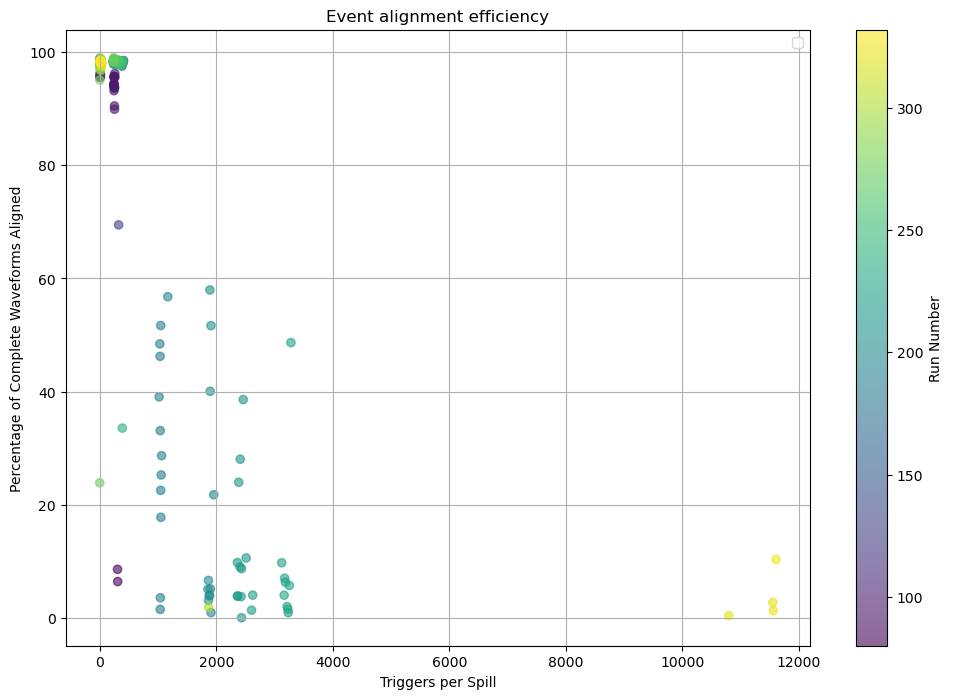

In [15]:
# Calculate the percentage of complete waveforms which are aligned for each device
for i in range(4):
    stats_df[f'Percentage Aligned Device {i+1}'] = (aligned_events / completed_waveforms.iloc[:, i]) * 100

# average the 4 devices
stats_df['Average Percentage Aligned'] = stats_df[[f'Percentage Aligned Device {i+1}' for i in range(4)]].mean(axis=1)

# Plot the percentage of complete waveforms which are aligned as a function of triggers per spill for each device
plt.figure(figsize=(12, 8))
scatter = plt.scatter(stats_df['# trigger per spill'], stats_df['Average Percentage Aligned'], c=stats_df['Run Number'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Run Number')

plt.xlabel('Triggers per Spill')
plt.ylabel('Percentage of Complete Waveforms Aligned')
plt.title('Event alignment efficiency')
plt.legend()
plt.grid(True)
plt.show()

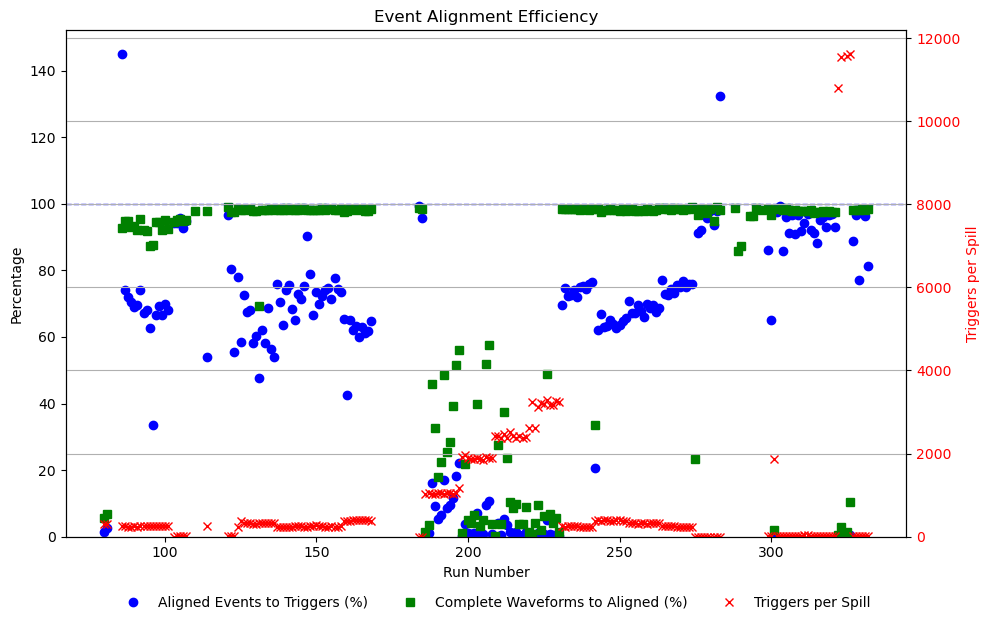

In [16]:
# Calculate the percentage of aligned events to triggers
stats_df['Percentage Aligned Events to Triggers'] = (stats_df['Aligned Events'] / stats_df['Number Triggers ']) * 100

# Calculate the percentage of complete waveforms to aligned
stats_df['Percentage Complete Waveforms to Aligned'] = (stats_df['Aligned Events'] / stats_df['Completed Waveforms Device 1']) * 100

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the percentage of aligned events to triggers on the primary y-axis
ax1.plot(stats_df['Run Number'], stats_df['Percentage Aligned Events to Triggers'], marker='o', linestyle='', color='b', label='Aligned Events to Triggers (%)')
ax1.plot(stats_df['Run Number'], stats_df['Percentage Complete Waveforms to Aligned'], marker='s', linestyle='', color='g', label='Complete Waveforms to Aligned (%)')
ax1.set_xlabel('Run Number')
ax1.set_ylabel('Percentage')
ax1.tick_params(axis='y')
ax1.set_title('Event Alignment Efficiency')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(stats_df['Run Number'], stats_df['# trigger per spill'], marker='x', linestyle='', color='r', label='Triggers per Spill')
ax2.set_ylabel('Triggers per Spill', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a blue dashed line at 100%
ax1.axhline(y=100, color='blue', linestyle='--', linewidth=1)

# Set both y-axes to a minimum of 0
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Add a legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=3, frameon=False)

# Add grid and show the plot
fig.tight_layout()
plt.grid(True)
plt.show()

/var/folders/g0/vmkg2n9102g8nnl0f2f90jsw0000gp/T/ipykernel_73734/1068308027.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(bottom=0)


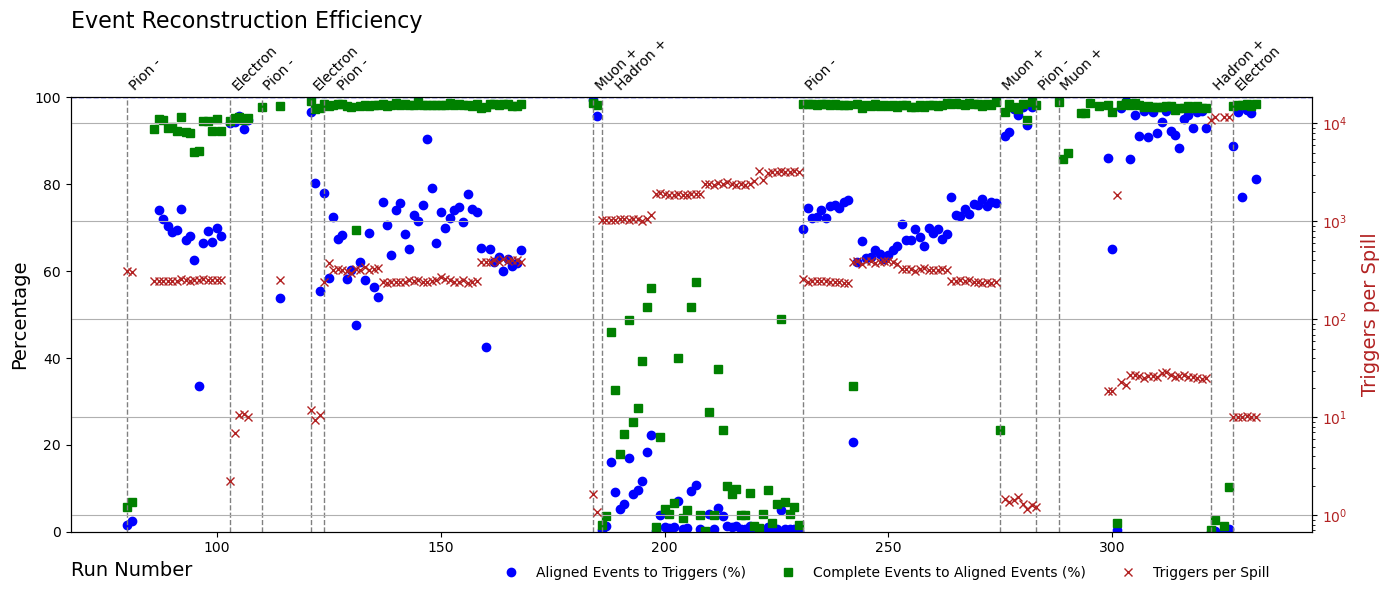

In [17]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the percentage of aligned events to triggers on the primary y-axis
ax1.plot(stats_df['Run Number'], stats_df['Percentage Aligned Events to Triggers'], marker='o', linestyle='', color='b', label='Aligned Events to Triggers (%)')
ax1.plot(stats_df['Run Number'], stats_df['Percentage Complete Waveforms to Aligned'], marker='s', linestyle='', color='g', label='Complete Events to Aligned Events (%)')
ax1.set_xlabel('Run Number', loc='left', fontsize=14)
ax1.set_ylabel('Percentage', fontsize=14)
ax1.tick_params(axis='y')
ax1.set_title('Event Reconstruction Efficiency', loc='left', pad=50, fontsize=16)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(stats_df['Run Number'], stats_df['# trigger per spill'], marker='x', linestyle='', color='firebrick', label='Triggers per Spill')
ax2.set_ylabel('Triggers per Spill', color='firebrick', fontsize=14, labelpad=10)
ax2.tick_params(axis='y', labelcolor='firebrick')
ax2.set_yscale('log')

# Add a blue dashed line at 100%
ax1.axhline(y=100, color='blue', linestyle='--', linewidth=1)

# Set both y-axes to a minimum of 0
ax1.set_ylim(bottom=0)
ax1.set_ylim(top=100)
ax2.set_ylim(bottom=0)

# Add vertical lines when the beam species changes
previous_species = None
previous_x = None
for i, species in enumerate(stats_df['beam species']):
    if species != previous_species:
        x = stats_df['Run Number'].iloc[i]
        ax1.axvline(x=x, color='gray', linestyle='--', linewidth=1)
        # Check if the text will overlap with the previous one
        if previous_x is not None and abs(x - previous_x) < 5:
            ax1.text(x + 2.5, ax1.get_ylim()[1] + 1, species, rotation=45, verticalalignment='bottom')
        else:
            ax1.text(x, ax1.get_ylim()[1] + 1, species, rotation=45, verticalalignment='bottom')
        previous_species = species
        previous_x = x

# Add a legend
fig.legend(loc='upper left', bbox_to_anchor=(0.35, 0.07), ncol=3, frameon=False)

# Add grid and show the plot
fig.tight_layout()
plt.grid(True)
plt.show()